## Loading the data


In [62]:
import pandas as pd
import json

# Load the CSV file
csv_file_path = 'KaggleData/supervised_dataset.csv'
df = pd.read_csv(csv_file_path).drop(columns=['Unnamed: 0'])
display(df.head())
display(df.info())

print("Value Counts of Target variable")
display(pd.DataFrame([df.classification.value_counts(), df.classification
                      .value_counts(normalize=True)], index=['Counts', 'Normalized']).T)

,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _id                             1699 non-null   object 
 1   inter_api_access_duration(sec)  1695 non-null   float64
 2   api_access_uniqueness           1695 non-null   float64
 3   sequence_length(count)          1699 non-null   float64
 4   vsession_duration(min)          1699 non-null   int64  
 5   ip_type                         1699 non-null   object 
 6   num_sessions                    1699 non-null   float64
 7   num_users                       1699 non-null   float64
 8   num_unique_apis                 1699 non-null   float64
 9   source                          1699 non-null   object 
 10  classification                  1699 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 146.1+ KB


None

Value Counts of Target variable


,Counts,Normalized
classification,,
normal,1106.0,0.650971
outlier,593.0,0.349029


The imbalance is not extreme, but it is noticeable.

In [63]:

# Load the JSON file
json_file_path = 'KaggleData/supervised_call_graphs.json'

with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Merge the dataframes on the _id field
# merged_df = pd.merge(df, json_data, on='_id')

# Display the merged dataframe
# display(merged_df.head())

# json_data

# from dataprep.eda import create_report
# create_report(df)

In [64]:
# Check for null values in the dataframe
null_rows = df[df.isnull().any(axis=1)]

# Display rows with null values
if null_rows.empty:
    print("There are no rows with null values in the dataframe.")
else:
    print("Rows with null values:")
    display(null_rows)

# Display count of null values in each column
print("\nCount of null values in each column:")
display(df.isnull().sum())


Rows with null values:


,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier



Count of null values in each column:


_id                               0
inter_api_access_duration(sec)    4
api_access_uniqueness             4
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64

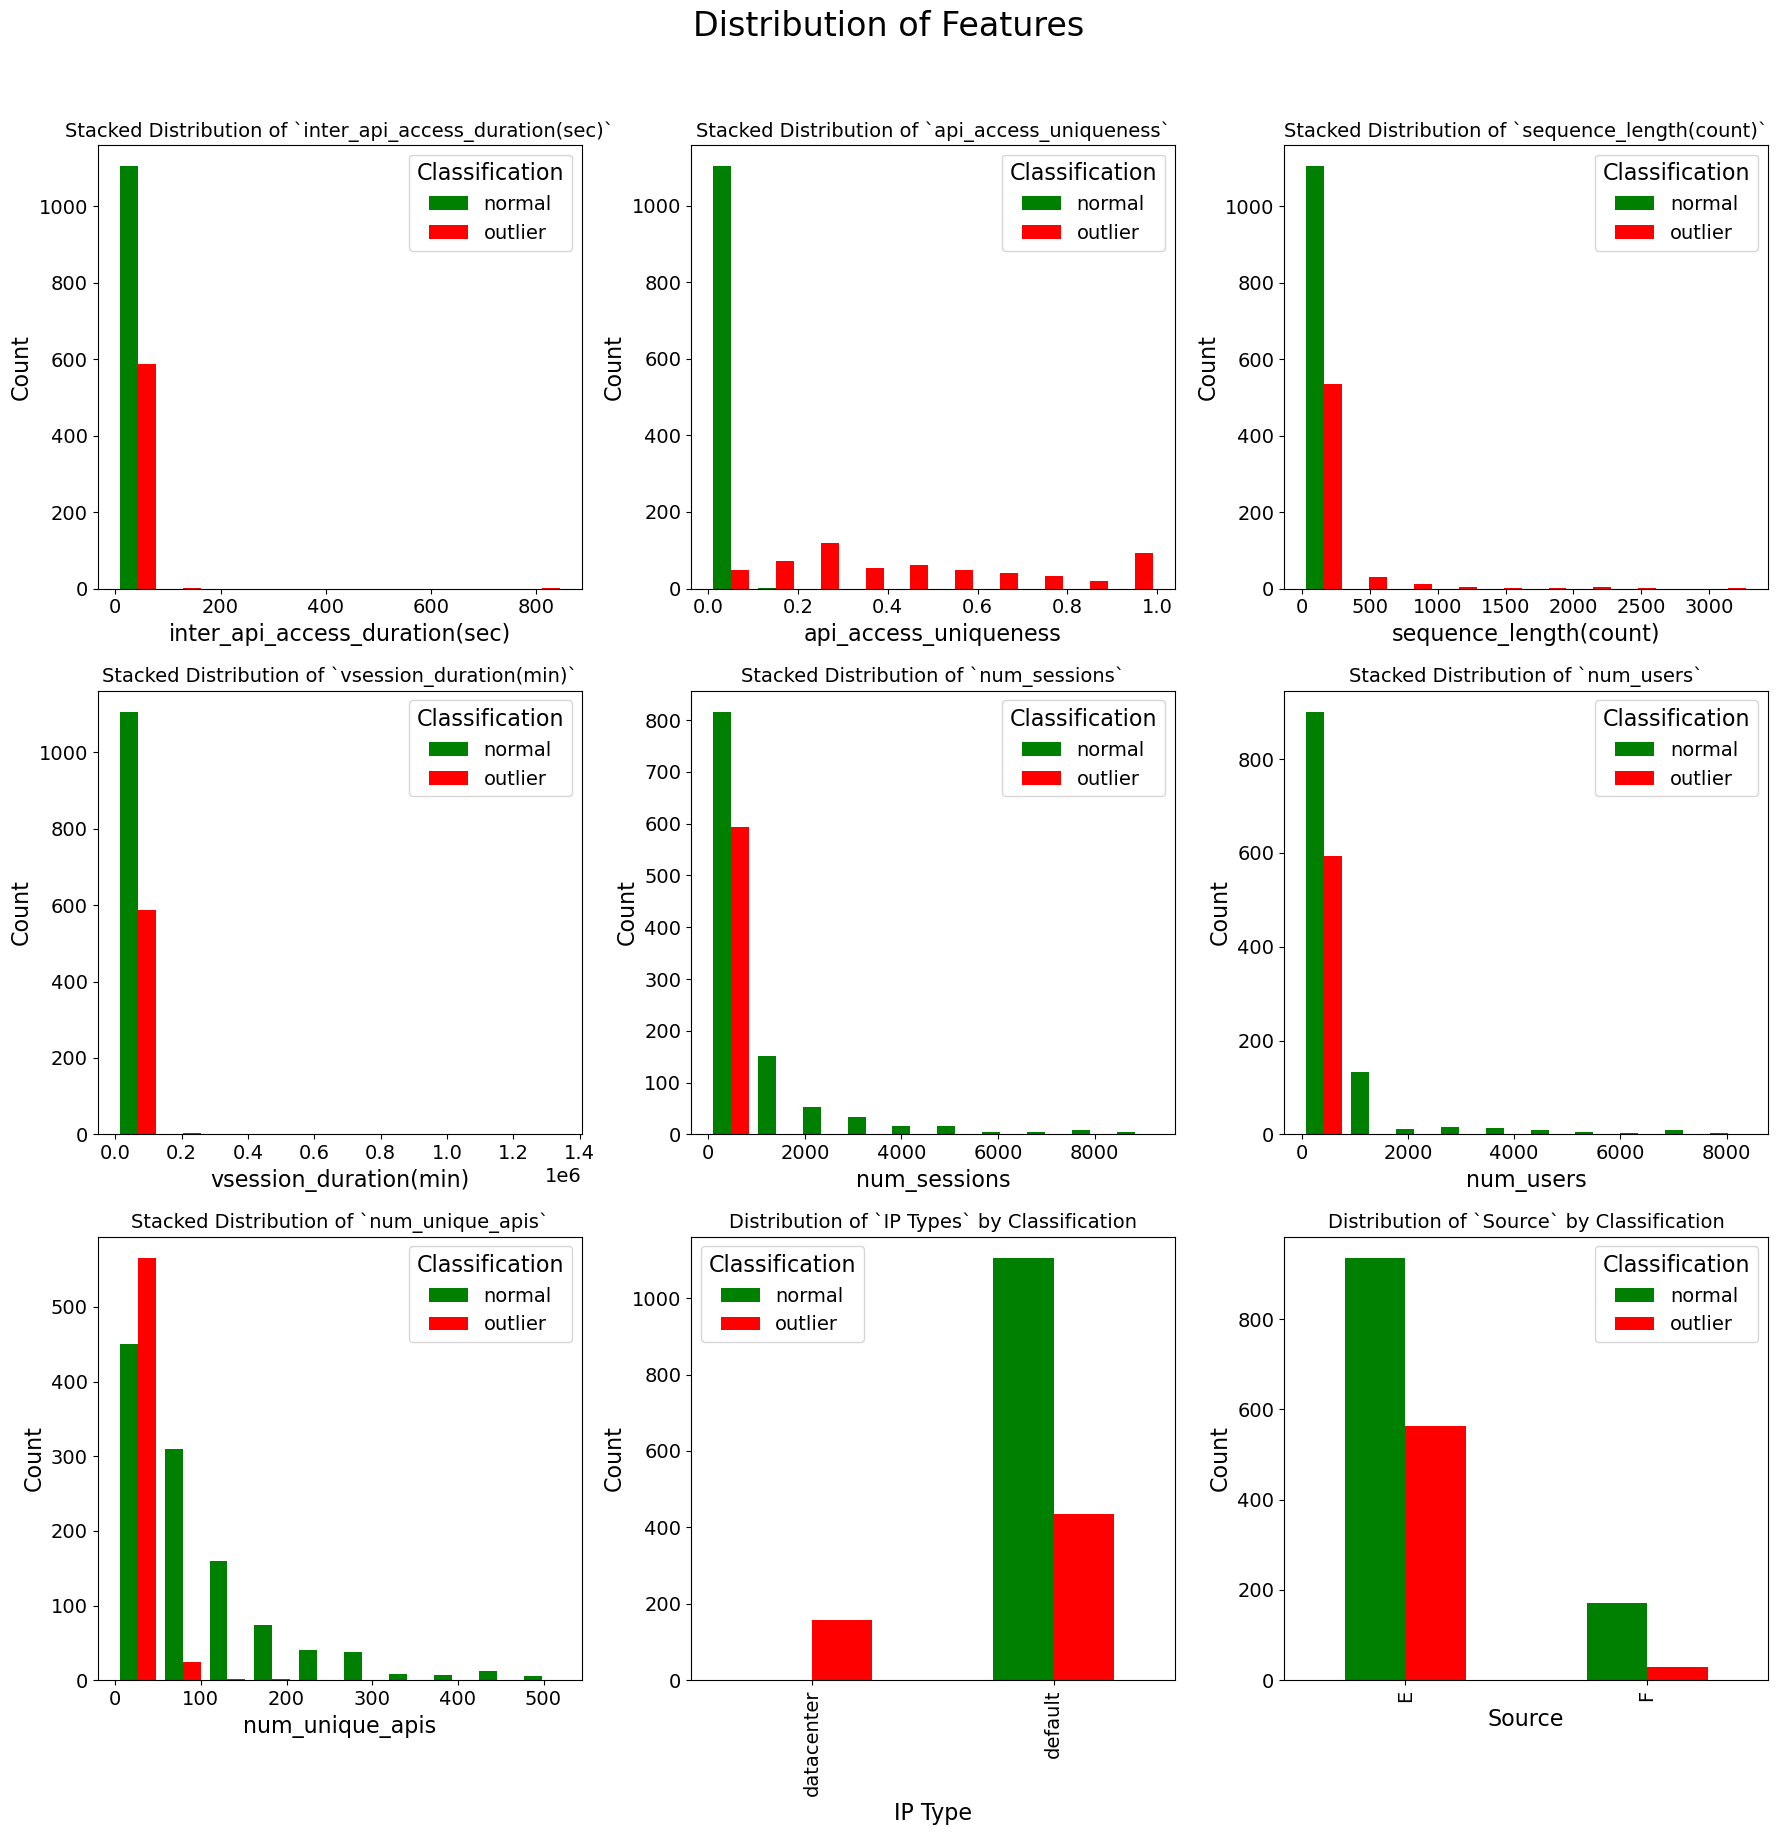


Summary Statistics:


,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,1695.000000,1695.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,1.501123,0.173226,61.648982,6.028341e+03,564.726898,406.263685,67.246616
std,21.697558,0.283641,205.803273,4.665042e+04,1179.931200,960.718580,82.189214
min,0.000003,0.001200,0.000000,1.000000e+00,2.000000,1.000000,0.000000
25%,0.000707,0.009199,9.984756,6.300000e+01,5.000000,1.000000,14.000000
50%,0.002574,0.018717,17.095238,1.950000e+02,164.000000,141.000000,37.000000
75%,0.024579,0.230769,41.349478,3.711500e+03,446.500000,308.500000,90.000000
max,852.929250,1.000000,3303.000000,1.352948e+06,9299.000000,8447.000000,524.000000


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Increase the default font size
plt.rcParams.update({'font.size': 14})

# Create a figure with subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Distribution of Features', fontsize=24, y=1.02)

# List of numerical columns to plot
numerical_columns = ['inter_api_access_duration(sec)', 'api_access_uniqueness', 
                     'sequence_length(count)', 'vsession_duration(min)', 
                     'num_sessions', 'num_users', 'num_unique_apis']

# Plot histograms
for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    axs[row, col_idx].hist([df[df['classification'] == 'normal'][col], 
                            df[df['classification'] == 'outlier'][col]], 
                           label=['normal', 'outlier'], 
                           color=['green', 'red'], 
                           stacked=False)
    axs[row, col_idx].set_title(f'Stacked Distribution of `{col}`', fontsize=14)
    axs[row, col_idx].set_xlabel(col, fontsize=16)
    axs[row, col_idx].set_ylabel('Count', fontsize=16)
    axs[row, col_idx].legend(title='Classification', fontsize=14, title_fontsize=16)
    axs[row, col_idx].tick_params(axis='both', which='major', labelsize=14)

# Plot bar chart for ip_type colored by classification
ip_type_counts = df.groupby(['ip_type', 'classification']).size().unstack()
ip_type_counts.plot(kind='bar',  ax=axs[2, 1], color=['green', 'red'])
axs[2, 1].set_title('Distribution of `IP Types` by Classification', fontsize=14)
axs[2, 1].set_xlabel('IP Type', fontsize=16)
axs[2, 1].set_ylabel('Count', fontsize=16)
axs[2, 1].legend(title='Classification', fontsize=14, title_fontsize=16)
axs[2, 1].tick_params(axis='both', which='major', labelsize=14)

# Plot bar chart for source colored by classification
source_counts = df.groupby(['source', 'classification']).size().unstack()
source_counts.plot(kind='bar',  ax=axs[2, 2], color=['green', 'red'])
axs[2, 2].set_title(f'Distribution of `Source` by Classification', fontsize=14)
axs[2, 2].set_xlabel('Source', fontsize=16)
axs[2, 2].set_ylabel('Count', fontsize=16)
axs[2, 2].legend(title='Classification', fontsize=14, title_fontsize=16)
axs[2, 2].tick_params(axis='both', which='major', labelsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
display(df.describe())


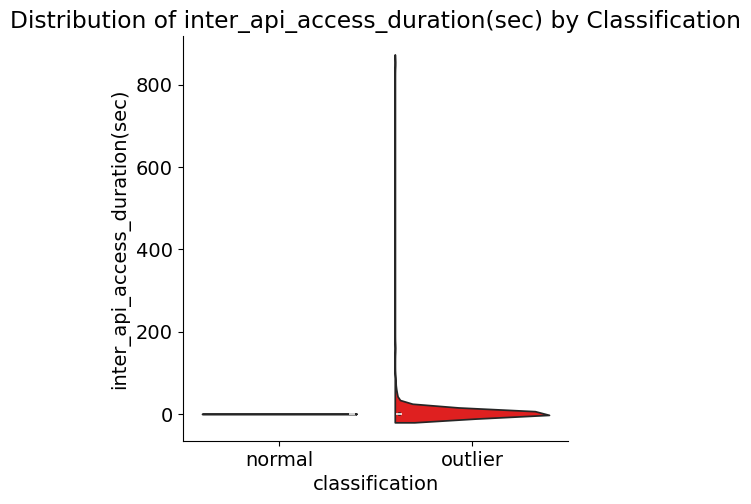

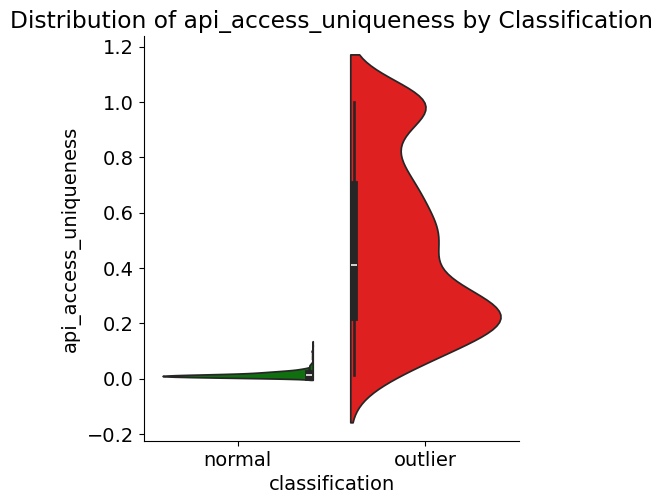

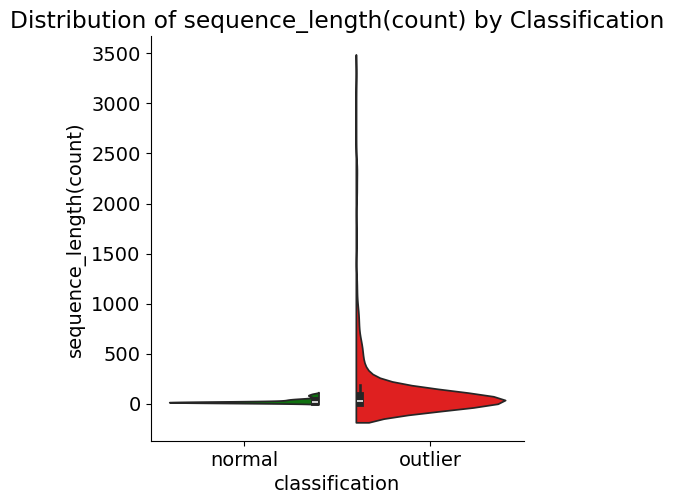

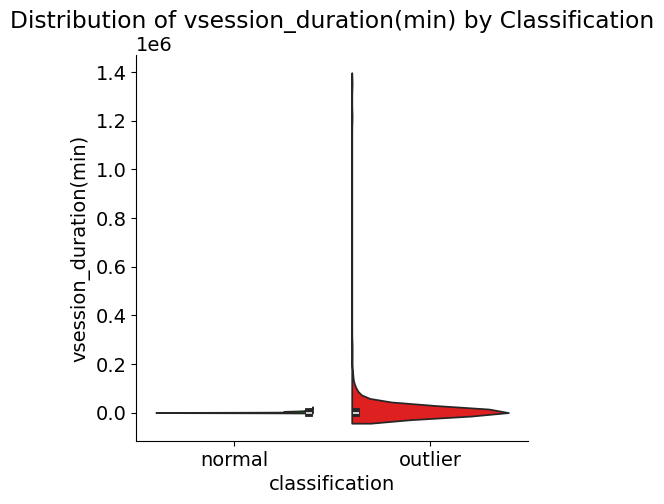

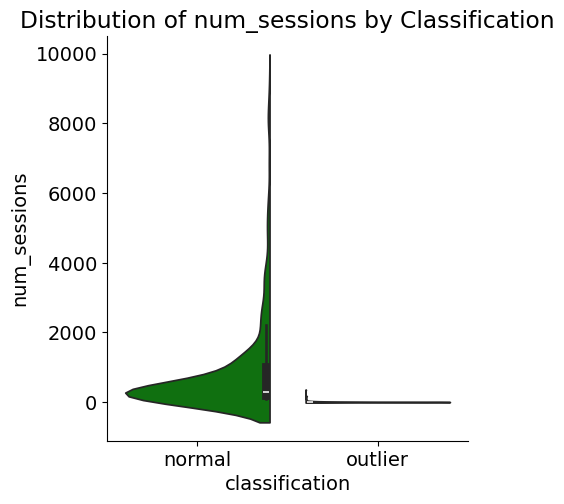

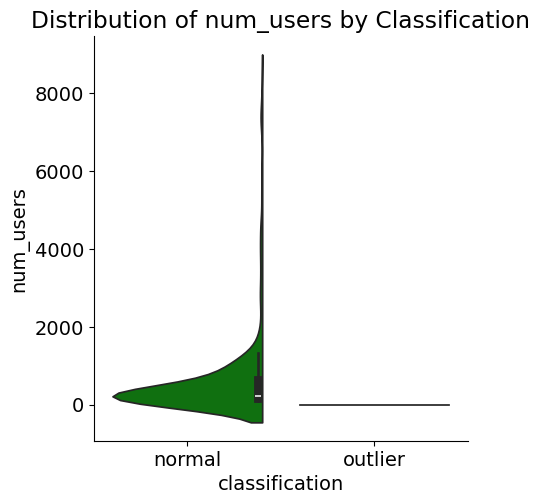

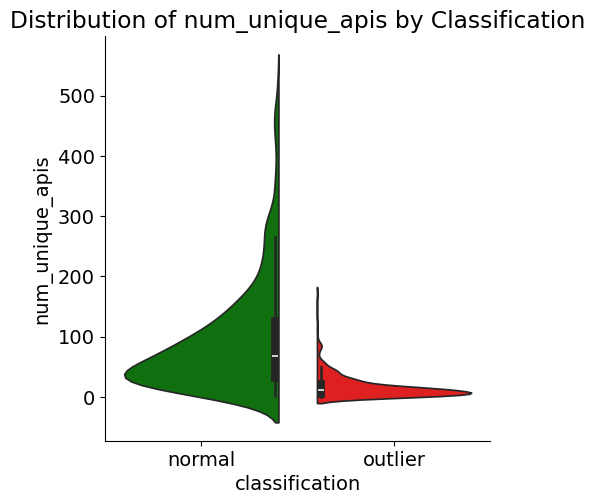

In [66]:
for col in numerical_columns:
    sns.catplot(
        data=df, x="classification", y=col, hue="classification",
        kind="violin", palette=['green', 'red'],split=True,

    )
    plt.title(f'Distribution of {col} by Classification')
    plt.show()

In [67]:
# Fill missing values with 0
df['inter_api_access_duration(sec)'] = df['inter_api_access_duration(sec)'].fillna(0)
df['api_access_uniqueness'] = df['api_access_uniqueness'].fillna(
    # Fill with the mean of the column
    df['api_access_uniqueness'].mean()
)
# Verify that there are no more missing values
print("\nMissing values after filling:")
print(df.isnull().sum().sum())


Missing values after filling:
0



Correlation Matrix:


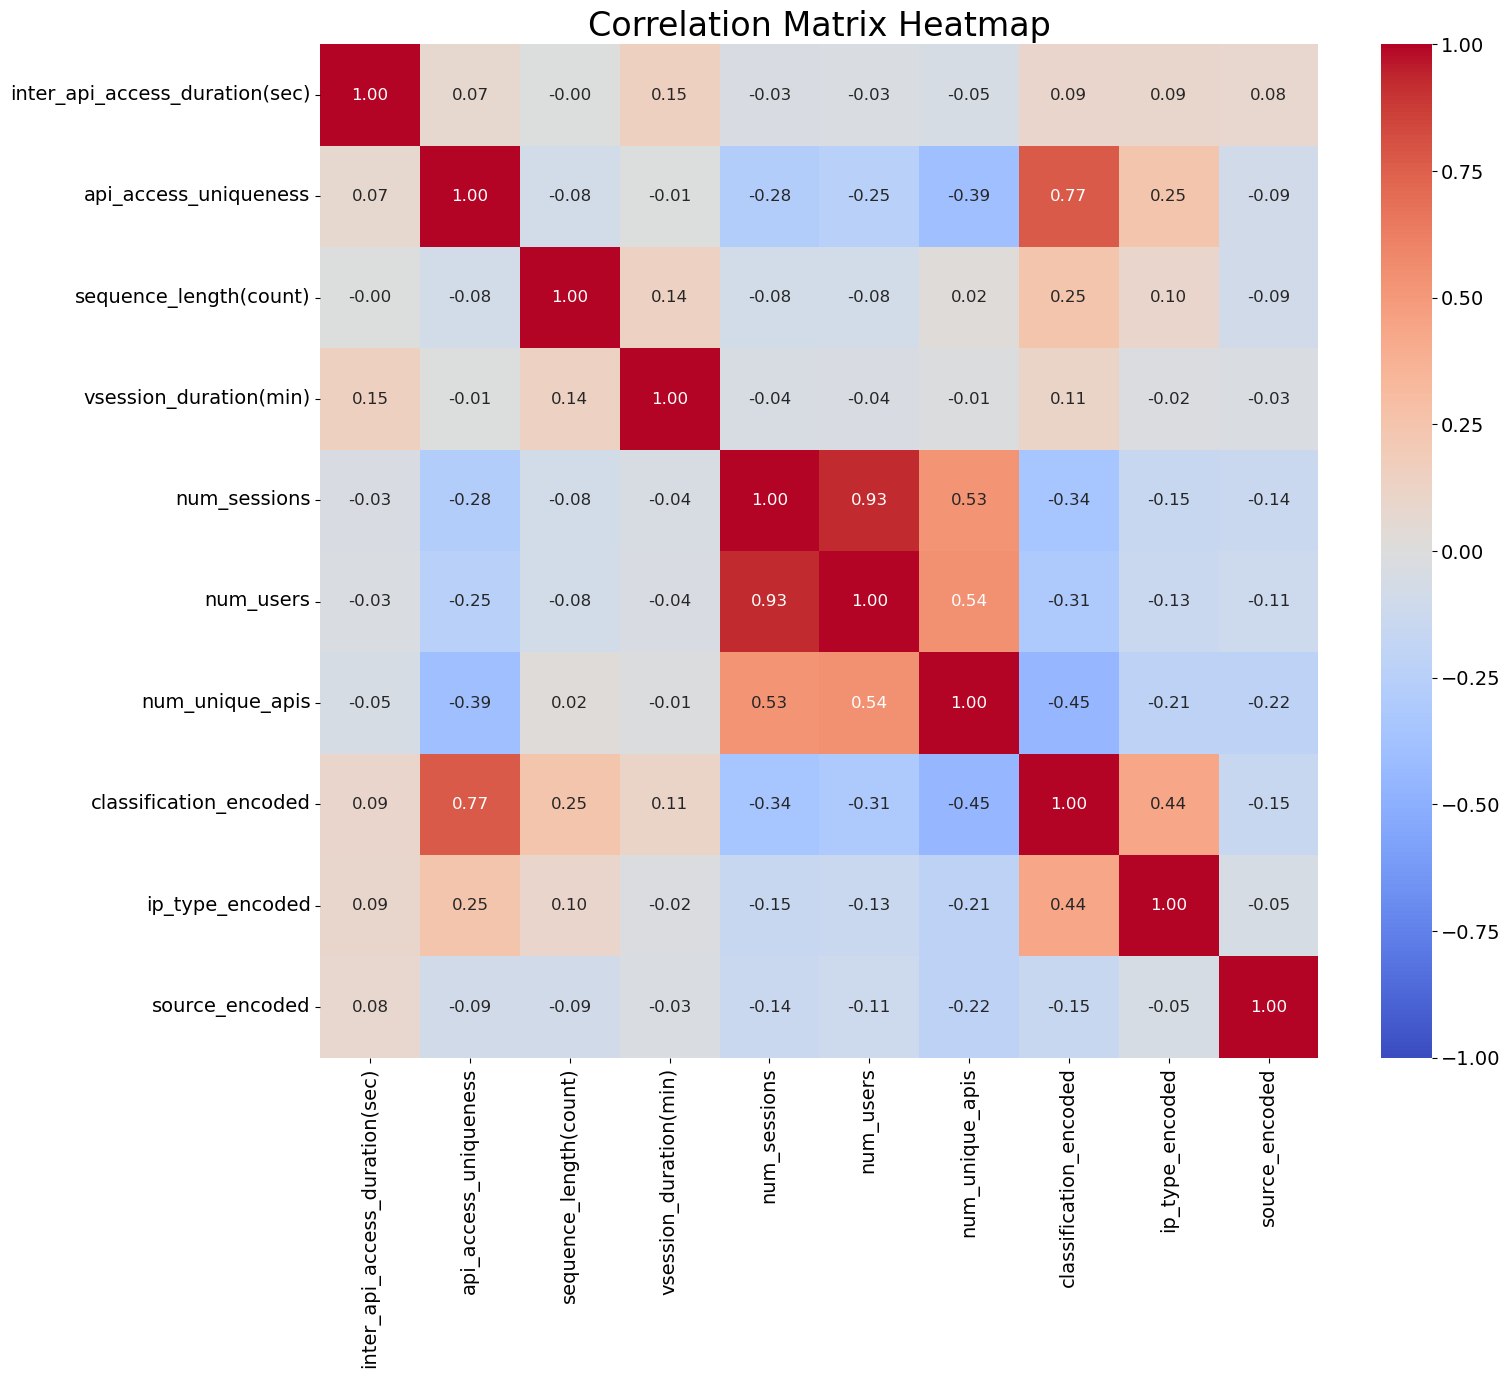

In [68]:

# Print correlation matrix
print("\nCorrelation Matrix:")
df['classification_encoded'] = df['classification'].apply(lambda x: 1 if x == 'outlier' else 0)
df['ip_type_encoded'] = df['ip_type'].apply(lambda x: 1 if x == 'datacenter' else 0)
df['source_encoded'] = df['source'].apply(lambda x: 1 if x == 'F' else 0)
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            annot_kws={"size": 12}, fmt='.2f')
plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.tight_layout()
plt.show()

Preprocessing


In [71]:
df.drop(columns=['_id', 'classification_encoded', 'ip_type_encoded','source_encoded'], inplace=True, errors='ignore'   )

In [87]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Identify categorical and numerical columns, excluding '_id'
categorical_columns = df.select_dtypes(include=['object']).columns.drop('_id',errors='ignore')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df[list(numerical_columns) + list(categorical_columns)],
    df['classification'],
    test_size=0.2,
    stratify=df['classification'],
    random_state=42
)
X_train_encoded=X_train.copy()
X_test_encoded=X_test.copy()
# One-hot encoding for categorical features
onehot_encoder = OneHotEncoder(sparse_output=False,drop='first')
X_train_encoded[categorical_columns] = onehot_encoder.fit_transform(X_train[categorical_columns])
X_test_encoded[categorical_columns] = onehot_encoder.transform(X_test[categorical_columns])

# Encode the target variable (classification) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Shape of training features (X_train):", X_train_encoded.shape)
print("Shape of test features (X_test):", X_test_encoded.shape)
print("Shape of training target (y_train):", y_train_encoded.shape)
print("Shape of test target (y_test):", y_test_encoded.shape)
print("\nEncoded feature names:", X_train_encoded.columns.tolist())
print("\nEncoded target classes:", label_encoder.classes_)

Shape of training features (X_train): (1359, 10)
Shape of test features (X_test): (340, 10)
Shape of training target (y_train): (1359,)
Shape of test target (y_test): (340,)

Encoded feature names: ['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'num_sessions', 'num_users', 'num_unique_apis', 'ip_type', 'source', 'classification']

Encoded target classes: ['normal' 'outlier']


In [75]:
import numpy as np
# making sure the outlier class is the 1 
unique, counts = np.unique(y_train_encoded, return_counts=True)
print(dict(zip(unique, counts)))

{0: 877, 1: 482}


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the scoring metric (F1 score)
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_encoded, y_train_encoded, cv=5, scoring=f1_scorer)

# Print the cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

# Train the final model on the entire training set
rf_model.fit(X_train_encoded, y_train_encoded)
# Evaluate the model on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Make predictions on the test set
y_pred = rf_model.predict(X_test_encoded)

# Calculate various metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Create a confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a classification report
cr = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Create a DataFrame for the classification report
cr_df = pd.DataFrame(cr).transpose()

print("Model Evaluation Metrics:")
display(metrics_df)
print("\nConfusion Matrix:")
display(cm_df)
print("\nClassification Report:")
display(cr_df)

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0
Standard deviation of CV scores: 0.0
Model Evaluation Metrics:


,Metric,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1 Score,1.0



Confusion Matrix:


,normal,outlier
normal,221,0
outlier,0,119



Classification Report:


,precision,recall,f1-score,support
normal,1.0,1.0,1.0,221.0
outlier,1.0,1.0,1.0,119.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,340.0
weighted avg,1.0,1.0,1.0,340.0


In [94]:
def evaluate_model(X, y, model, label_encoder):
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    import pandas as pd

    # Make predictions
    y_pred = model.predict(X)

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Create confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Create classification report
    cr = classification_report(y, y_pred, target_names=label_encoder.classes_, output_dict=True)

    # Create DataFrames
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1]
    })

    cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)
    cr_df = pd.DataFrame(cr).transpose()

    # Print results
    print("Model Evaluation Metrics:")
    display(metrics_df)
    print("\nConfusion Matrix:")
    display(cm_df)
    print("\nClassification Report:")
    display(cr_df)

    return metrics_df, cm_df, cr_df

# apply on train set
print("Train set evaluations:")
metrics_df, cm_df, cr_df = evaluate_model(X_train_encoded, y_train_encoded, rf_model, label_encoder)

# apply on test set
print("Test set evaluations:")
metrics_df, cm_df, cr_df = evaluate_model(X_test_encoded, y_test_encoded, rf_model, label_encoder)

Train set evaluations:
Model Evaluation Metrics:


,Metric,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1 Score,1.0



Confusion Matrix:


,normal,outlier
normal,885,0
outlier,0,474



Classification Report:


,precision,recall,f1-score,support
normal,1.0,1.0,1.0,885.0
outlier,1.0,1.0,1.0,474.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1359.0
weighted avg,1.0,1.0,1.0,1359.0


Test set evaluations:
Model Evaluation Metrics:


,Metric,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1 Score,1.0



Confusion Matrix:


,normal,outlier
normal,221,0
outlier,0,119



Classification Report:


,precision,recall,f1-score,support
normal,1.0,1.0,1.0,221.0
outlier,1.0,1.0,1.0,119.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,340.0
weighted avg,1.0,1.0,1.0,340.0


Well that was pretty easy. let's try to train and predict with a more extreme imbalance in the data.

Let's try the model on `remaining_behavior_dataset.csv`
